# 5 Minute Project

### Import package

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,zscore
import seaborn as sns
import folium

In [ ]:
sns.set(color_codes=True)

### Prepare For Analytic

Reading Datasource locally 

In [200]:
Data_Scourse = pd.read_csv('./Large Data Sets/worlddata.csv')
Data_Scourse.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


Checking Datasource

In [201]:
len(Data_Scourse['IndicatorName'].unique())

1344

In [202]:
list(Data_Scourse['IndicatorName'].unique())

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

Try to analysis CO2 data. Filter IndicatorCode which contrains 'CO2'

In [203]:
CO2_df = Data_Scourse[(Data_Scourse['IndicatorCode'].str.contains('CO2'))]

In [204]:
IndicatorName_list = list(CO2_df['IndicatorName'].unique())
IndicatorName_list

['CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from solid fuel consumption (kt)',
 'CO2 emissions from transport (% of total fuel combustion)',
 'CO2 intensity (kg per kg of oil equivalent energy use)',
 'CO2 emissions (kg per 2005 US$ of GDP)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'Adju

Spliting into multiple small dataframes

In [205]:
df_CO2_emission_kt = CO2_df[CO2_df['IndicatorName'] == 'CO2 emissions (kt)']
df_CO2_emission_gas = CO2_df[CO2_df['IndicatorName'] == 'CO2 emissions from gaseous fuel consumption (% of total)']
df_CO2_emission_liquid = CO2_df[CO2_df['IndicatorName'] == 'CO2 emissions from liquid fuel consumption (% of total)']
df_CO2_emission_solid = CO2_df[CO2_df['IndicatorName'] == 'CO2 emissions from solid fuel consumption (% of total)']
df_CO2_emission_ele = CO2_df[CO2_df['IndicatorName'] == 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)']
df_CO2_emission_manu = CO2_df[CO2_df['IndicatorName'] == 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)']
df_CO2_emission_building = CO2_df[CO2_df['IndicatorName'] == 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)']
df_CO2_emission_trans = CO2_df[CO2_df['IndicatorName'] == 'CO2 emissions from transport (% of total fuel combustion)']
df_CO2_Danage = CO2_df[CO2_df['IndicatorName'] == 'Adjusted savings: carbon dioxide damage (current US$)']

In [206]:
df_CO2_emission_kt = df_CO2_emission_kt.rename(columns={'Value': df_CO2_emission_kt['IndicatorName'].iloc[0]})
df_CO2_emission_gas = df_CO2_emission_gas.rename(columns={'Value': 'Emission from gas'})
df_CO2_emission_liquid = df_CO2_emission_liquid.rename(columns={'Value': 'Emission from liquid'})
df_CO2_emission_solid = df_CO2_emission_solid.rename(columns={'Value': 'Emission from solid'})
df_CO2_emission_ele = df_CO2_emission_ele.rename(columns={'Value': 'Emission from ele'})
df_CO2_emission_manu = df_CO2_emission_manu.rename(columns={'Value': 'Emission from manu'})
df_CO2_emission_building = df_CO2_emission_building.rename(columns={'Value': 'Emission from building'})
df_CO2_emission_trans = df_CO2_emission_trans.rename(columns={'Value': 'Emission from trans'})
df_CO2_Danage = df_CO2_Danage.rename(columns={'Value': 'CO2 Damage'})

Keep the required columns and merge them into a dataframe in the target format

In [207]:
df_merged = pd.merge(df_CO2_emission_kt, df_CO2_emission_gas, on=['CountryName', 'Year'], suffixes=('', 'df_CO2_emission_gas'))
df_merged = pd.merge(df_merged, df_CO2_emission_liquid, on=['CountryName', 'Year'], suffixes=('', 'df_CO2_emission_liquid'))
df_merged = pd.merge(df_merged, df_CO2_emission_solid, on=['CountryName', 'Year'], suffixes=('', 'df_CO2_emission_solid'))
df_merged = pd.merge(df_merged, df_CO2_emission_ele, on=['CountryName', 'Year'], suffixes=('', 'df_CO2_emission_ele'))
df_merged = pd.merge(df_merged, df_CO2_emission_manu, on=['CountryName', 'Year'], suffixes=('', 'df_CO2_emission_manu'))
df_merged = pd.merge(df_merged, df_CO2_emission_building, on=['CountryName', 'Year'], suffixes=('', 'df_CO2_emission_building'))
df_merged = pd.merge(df_merged, df_CO2_emission_trans, on=['CountryName', 'Year'], suffixes=('', 'df_CO2_emission_trans'))
df_merged = pd.merge(df_merged, df_CO2_Danage, on=['CountryName', 'Year'], suffixes=('', 'df_CO2_Danage'))


df_merged = df_merged[['CountryName','CountryCode', 'Year', 'CO2 emissions (kt)', 'Emission from gas','Emission from liquid',
                       'Emission from solid','Emission from ele','Emission from manu',
                       'Emission from building','Emission from trans','CO2 Damage']]

In [208]:
df_merged.head()

,CountryName,CountryCode,Year,CO2 emissions (kt),Emission from gas,Emission from liquid,Emission from solid,Emission from ele,Emission from manu,Emission from building,Emission from trans,CO2 Damage
0,Australia,AUS,1970,147618.752,1.868045,46.241554,50.370131,37.670463,32.454660,3.099958,22.592436,1.970403e+08
1,Austria,AUT,1970,50692.608,11.197917,48.922164,35.141782,20.223512,28.562218,31.635504,19.514292,6.766407e+07
2,Belgium,BEL,1970,125620.419,6.243979,52.047757,39.037277,24.731363,36.072868,27.476494,9.486232,1.676771e+08
3,Canada,CAN,1970,341485.708,18.354023,61.948585,17.237232,22.259156,23.957452,28.517466,24.353318,4.558123e+08
4,Denmark,DNK,1970,62100.645,0.000000,82.822557,15.081193,27.891617,18.255715,36.545301,12.209992,8.289143e+07


In [160]:
data_to_plot = df_merged.groupby('CountryCode')['CO2 Damage'].mean().reset_index()
data_to_plot = data_to_plot[['CountryCode','CO2 Damage']]
data_to_plot.head()

,CountryCode,CO2 Damage
0,AGO,6.743547e+07
1,ALB,2.348733e+07
2,ARE,4.782833e+08
3,ARG,7.215192e+08
4,ARM,2.863894e+07


### Data Visualization

Loading Online Map

In [161]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
world_geo = f'{url}/world-countries.json'

In [165]:
map2 = folium.Map(location=[40, 0], zoom_start=0.5)

Map populated with data from dataset

Setting the data range interval

In [166]:
folium.Choropleth(geo_data=world_geo,
                  data=data_to_plot,
             name='choropleth',
             columns=['CountryCode', 'CO2 Damage'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='CO2 Damage',
             threshold_scale=[data_to_plot['CO2 Damage'].min(),
                              data_to_plot['CO2 Damage'].quantile(0.2),
                              data_to_plot['CO2 Damage'].median(),
                              data_to_plot['CO2 Damage'].quantile(0.98),
                              data_to_plot['CO2 Damage'].max()]).add_to(map2)
folium.LayerControl().add_to(map2)

In [167]:
map2

In [66]:
list(df_merged['CountryName'].unique())

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Luxembourg',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Bahrain',
 'Benin',
 'Bolivia',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cameroon',
 'Chile',
 'China',
 'Colombia',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Cuba',
 'Cyprus',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Ethiopia',
 'Gabon',
 'Ghana',
 'Guatemala',
 'Haiti',
 'Honduras',
 'Hong Kong SAR, China',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Iraq',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kenya',
 'Korea, Rep.',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Ni

Recognizing which countries are represented in the Russian Federation

In [168]:
df_test = df_merged[df_merged['CountryName'] == 'Russian Federation']
df_test

,CountryName,CountryCode,Year,CO2 emissions (kt),Emission from gas,Emission from liquid,Emission from solid,Emission from ele,Emission from manu,Emission from building,Emission from trans,CO2 Damage
2364,Russian Federation,RUS,1992,2081840.241,40.077820,28.015775,29.769800,60.567592,12.534865,10.224594,13.982240,1.112889e+10
2495,Russian Federation,RUS,1993,1941203.457,42.004568,27.583113,28.511762,59.502243,12.146373,11.083032,12.777048,1.074882e+10
2627,Russian Federation,RUS,1994,1701132.301,44.116766,23.644383,30.558543,62.130501,10.907523,11.237001,12.739197,9.732992e+09
2760,Russian Federation,RUS,1995,1634312.227,44.373218,23.194617,30.645237,60.632053,13.589268,10.491233,12.147068,9.657877e+09
2893,Russian Federation,RUS,1996,1615804.878,45.120213,21.963580,31.367530,63.363243,12.124705,10.193870,11.786744,9.837075e+09
3025,Russian Federation,RUS,1997,1528849.307,46.674790,21.949242,29.852418,62.948500,12.386254,10.597860,11.578637,9.578221e+09
3158,Russian Federation,RUS,1998,1498343.534,47.533052,22.050063,28.731382,63.240267,11.189157,10.153542,13.748897,9.600471e+09
3292,Russian Federation,RUS,1999,1533968.439,46.966535,21.108155,30.123328,62.127028,11.803243,10.942103,13.487066,1.009644e+10
3426,Russian Federation,RUS,2000,1558111.967,46.892100,21.403574,29.814239,61.273986,13.663878,10.727457,12.531402,1.061198e+10
3560,Russian Federation,RUS,2001,1558001.957,47.821574,21.470282,28.701653,61.115413,13.251452,10.835058,12.947066,1.098049e+10


In [169]:
list(Data_Scourse['CountryCode'].unique())

['ARB',
 'CSS',
 'CEB',
 'EAS',
 'EAP',
 'EMU',
 'ECS',
 'ECA',
 'EUU',
 'FCS',
 'HPC',
 'HIC',
 'NOC',
 'OEC',
 'LCN',
 'LAC',
 'LDC',
 'LMY',
 'LIC',
 'LMC',
 'MEA',
 'MNA',
 'MIC',
 'NAC',
 'OED',
 'OSS',
 'PSS',
 'SST',
 'SAS',
 'SSF',
 'SSA',
 'UMC',
 'WLD',
 'AFG',
 'ALB',
 'DZA',
 'ASM',
 'ADO',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'ABW',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CYM',
 'CAF',
 'TCD',
 'CHI',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'ZAR',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CUW',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'ETH',
 'FRO',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRL',
 'GRD',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'IMY',


Extracted data for three countries for analysis from 1995 to 2010

In [214]:
country_list = ['China','United States','Russian Federation']
df_merged = df_merged[(df_merged['Year'] > 1995) & (df_merged['Year'] <= 2010)]

In [215]:
list(df_merged['Year'].unique())

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [216]:
df_country_limit = df_merged[df_merged['CountryName'].isin(country_list)]

Plotting line graphs

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


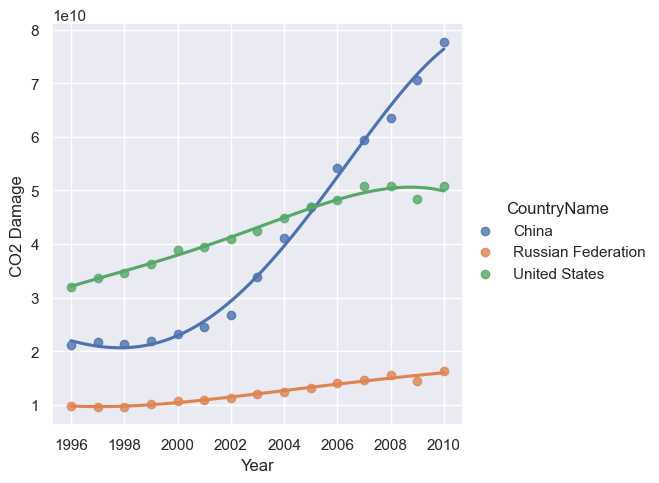

In [217]:
sns.lmplot(x="Year", y="CO2 Damage", hue="CountryName", data=df_country_limit, order=4, ci=None)

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


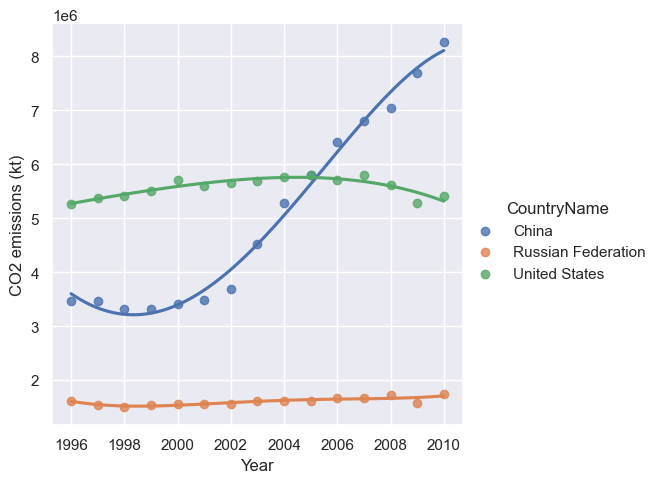

In [199]:
sns.lmplot(x="Year", y="CO2 emissions (kt)", hue="CountryName", data=df_country_limit[(df_country_limit['Year'] > 1995) 
                                                                             & (df_country_limit['Year'] <= 2019)]
          , order=4, ci=None)

Grouping different countries into different dataframes

In [194]:
dfs = {}
for name, group in df_merged.groupby('CountryName'):
    dfs[name] = group.reset_index(drop=True)
dfs['China'].head()

,CountryName,CountryCode,Year,CO2 emissions (kt),Emission from gas,Emission from liquid,Emission from solid,Emission from ele,Emission from manu,Emission from building,Emission from trans,CO2 Damage
0,China,CHN,1996,3463089.131,1.285164,14.756780,76.884517,42.594870,37.862717,5.925463,6.146782,2.108340e+10
1,China,CHN,1997,3469510.048,1.273802,16.095013,75.275539,42.744919,37.274998,10.683536,5.477757,2.173644e+10
2,China,CHN,1998,3324344.519,1.520368,16.837000,73.601660,44.404766,37.735020,8.558504,5.307891,2.130037e+10
3,China,CHN,1999,3318055.614,1.646033,17.999717,71.742028,46.637324,33.935309,9.100688,5.997059,2.183913e+10
4,China,CHN,2000,3405179.867,1.757482,19.065562,70.433588,47.460326,34.270876,8.044543,8.081400,2.319198e+10


Different Way to draw line graphs

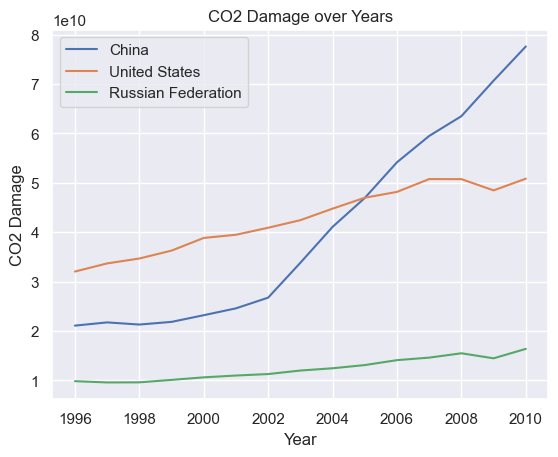

In [181]:
for country in country_list:
    plt.plot(dfs[country]['Year'],dfs[country]['CO2 Damage'], label=country)
    
plt.xlabel('Year')
plt.ylabel('CO2 Damage')
plt.title('CO2 Damage over Years')
plt.legend()
plt.show()

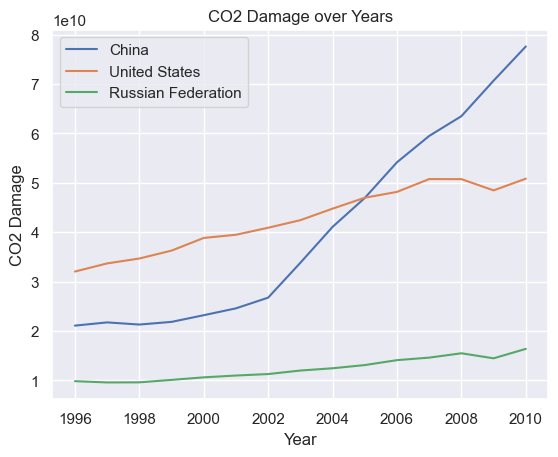

In [182]:
for country in country_list:
    plt.plot(dfs[country]['Year'],dfs[country]['CO2 Damage'], label=country)
    
plt.xlabel('Year')
plt.ylabel('CO2 Damage')
plt.title('CO2 Damage over Years')
plt.legend()
plt.show()

Plotting a box-and-line diagram

/Users/xintong/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


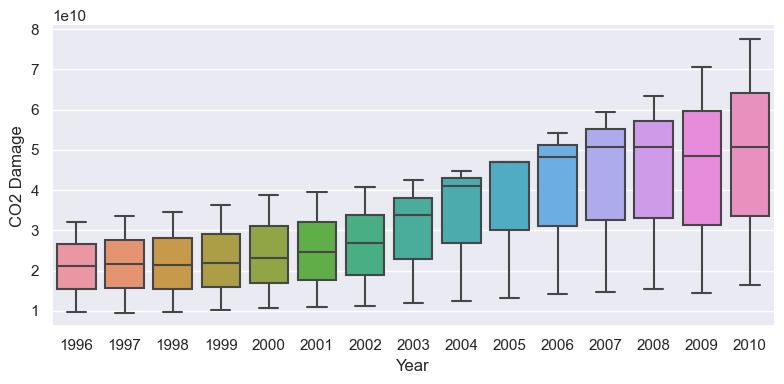

In [185]:
sns.catplot(x="Year", y="CO2 Damage", kind="box", data=df_merged[df_merged['CountryName'].isin(country_list)], height=4, aspect=2)

In [218]:
df_China = dfs['China']
df_China_95_05 = df_China[(df_China['Year'] <= 2005) & (df_China['Year'] > 1995)]
df_China_95_05.head()

,CountryName,CountryCode,Year,CO2 emissions (kt),Emission from gas,Emission from liquid,Emission from solid,Emission from ele,Emission from manu,Emission from building,Emission from trans,CO2 Damage
0,China,CHN,1996,3463089.131,1.285164,14.756780,76.884517,42.594870,37.862717,5.925463,6.146782,2.108340e+10
1,China,CHN,1997,3469510.048,1.273802,16.095013,75.275539,42.744919,37.274998,10.683536,5.477757,2.173644e+10
2,China,CHN,1998,3324344.519,1.520368,16.837000,73.601660,44.404766,37.735020,8.558504,5.307891,2.130037e+10
3,China,CHN,1999,3318055.614,1.646033,17.999717,71.742028,46.637324,33.935309,9.100688,5.997059,2.183913e+10
4,China,CHN,2000,3405179.867,1.757482,19.065562,70.433588,47.460326,34.270876,8.044543,8.081400,2.319198e+10


Analysis of CO2 emissions by industry type and fuel type

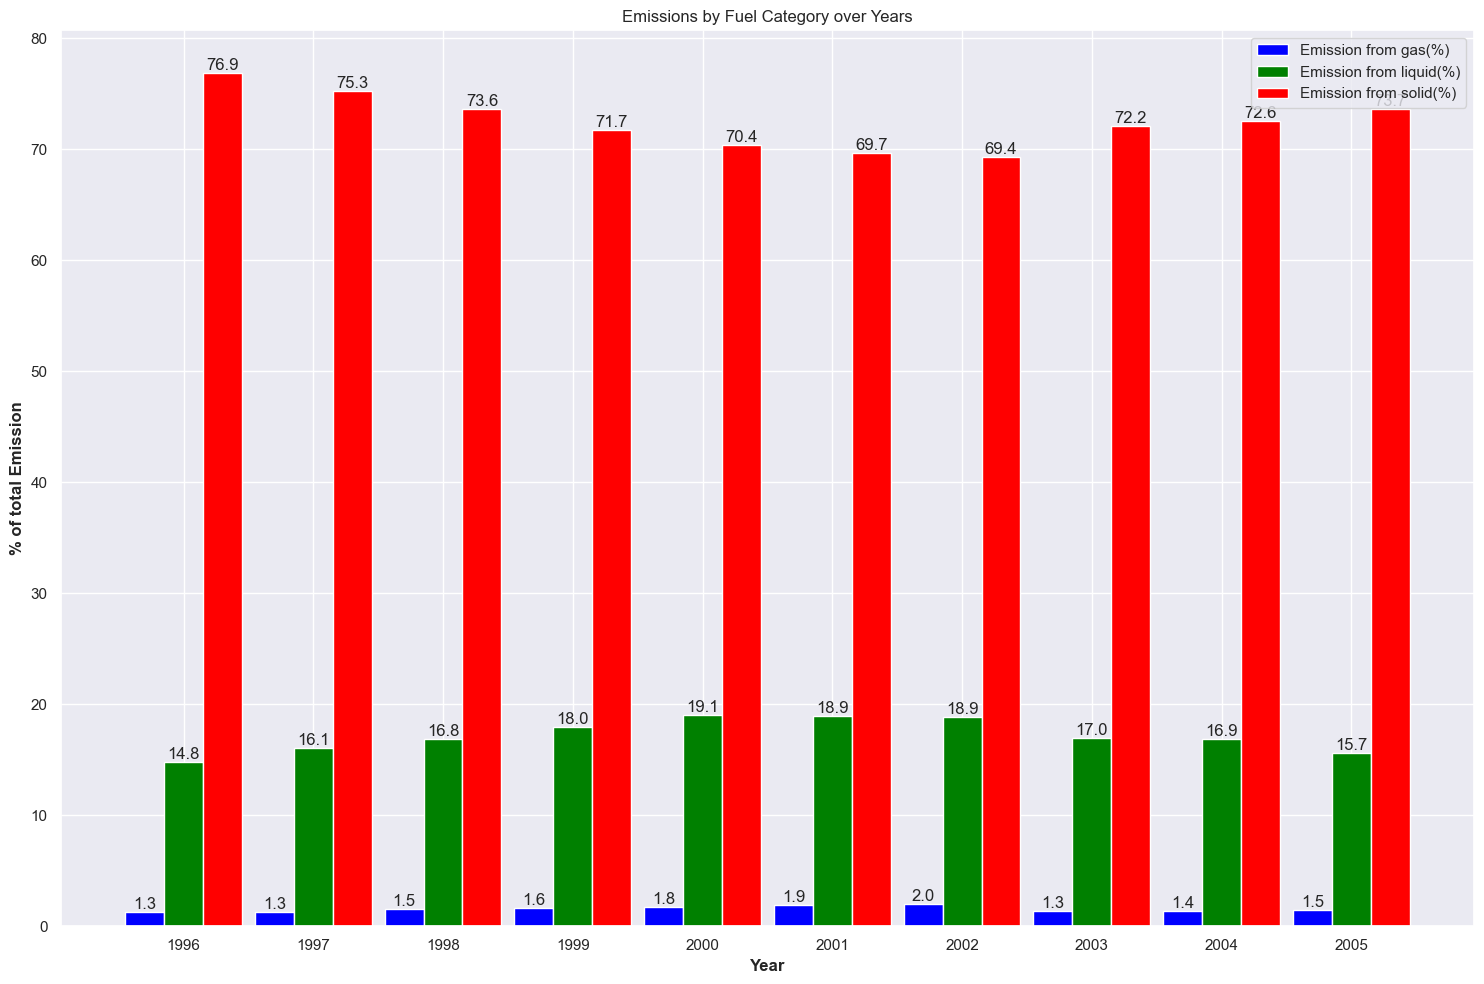

In [219]:
bar_width = 0.3
r1 = range(len(df_China_95_05['Year']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15, 10))

bars1 = plt.bar(r1, df_China_95_05['Emission from gas'], width = bar_width, label='Emission from gas(%)', color='blue')
bars2 = plt.bar(r2, df_China_95_05['Emission from liquid'], width = bar_width, label='Emission from liquid(%)', color='green')
bars3 = plt.bar(r3, df_China_95_05['Emission from solid'], width = bar_width, label='Emission from solid(%)', color='red')


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('% of total Emission', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(df_China_95_05['Year']))], df_China_95_05['Year'])
plt.title('Emissions by Fuel Category over Years')
plt.legend()

plt.tight_layout()
plt.show()

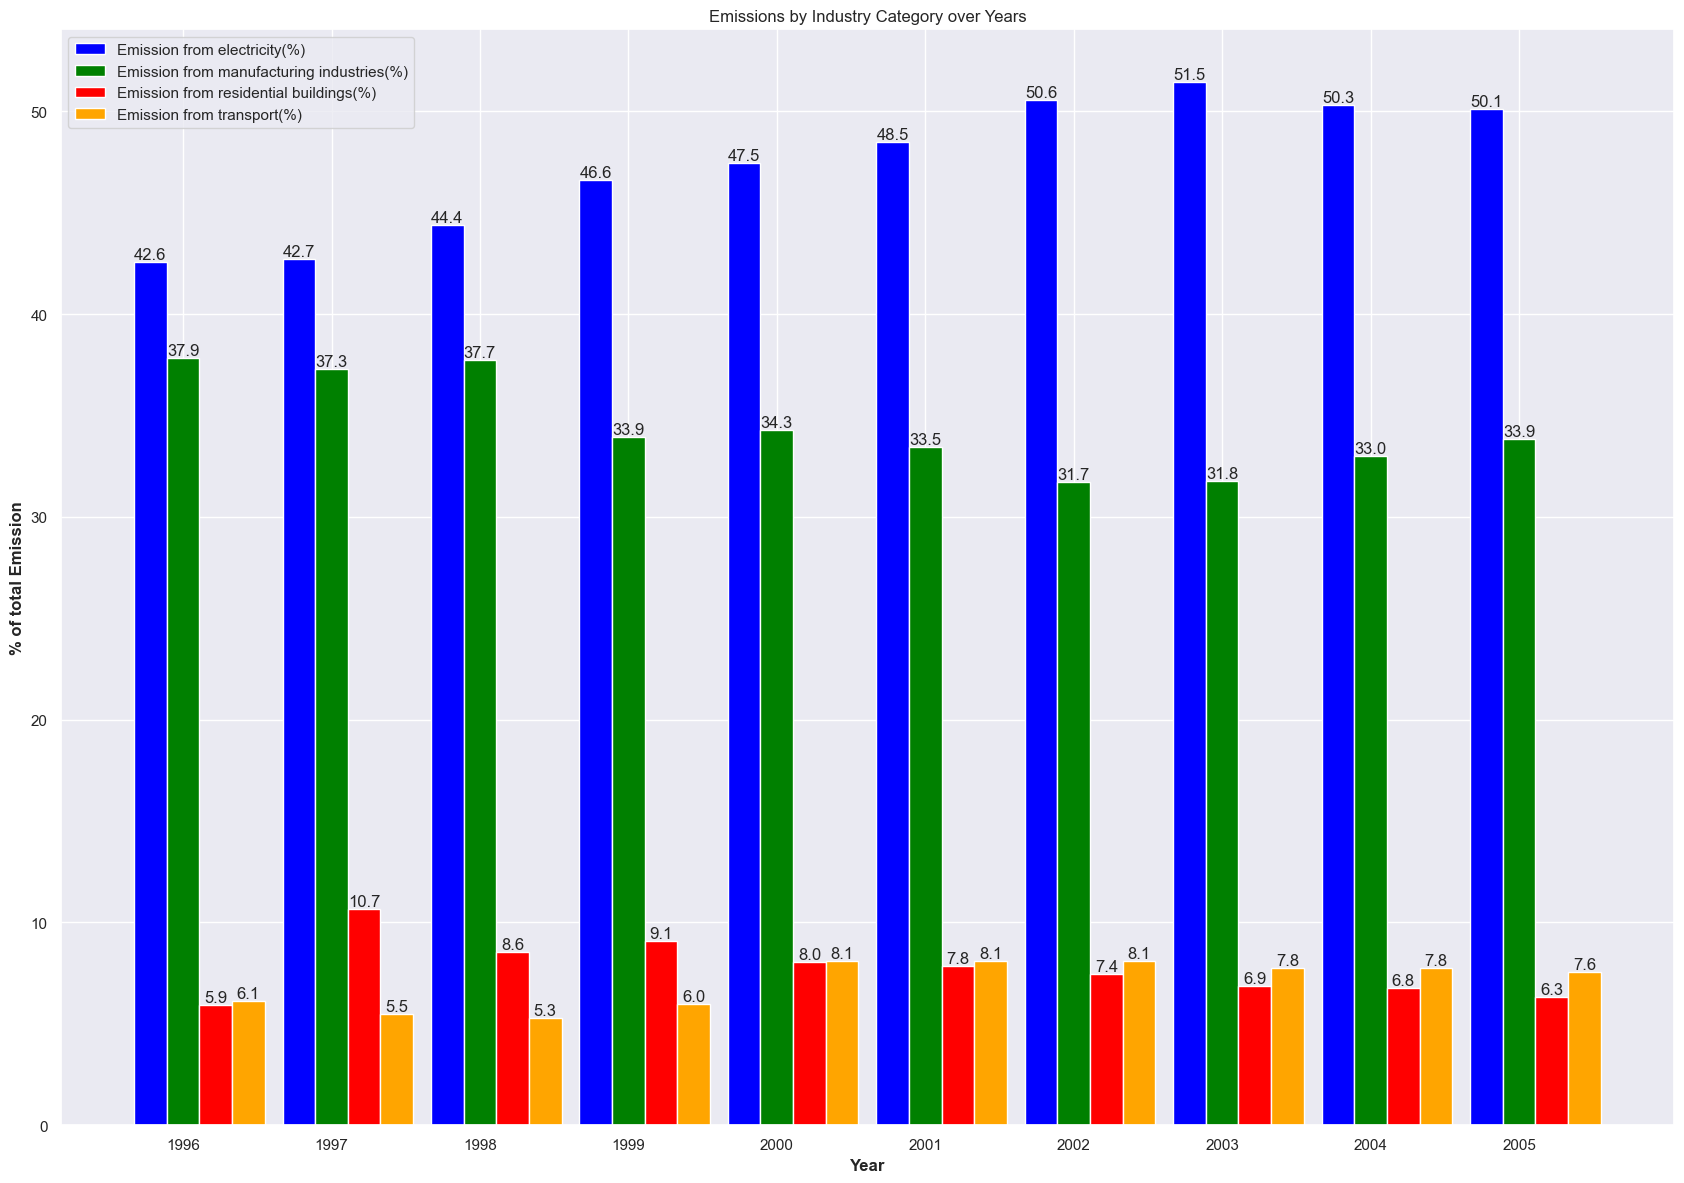

In [220]:
bar_width = 0.22
r1 = range(len(df_China_95_05['Year']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(17, 12))

bars1 = plt.bar(r1, df_China_95_05['Emission from ele'], width = bar_width, label='Emission from electricity(%)', color='blue')
bars2 = plt.bar(r2, df_China_95_05['Emission from manu'], width = bar_width, label='Emission from manufacturing industries(%)', color='green')
bars3 = plt.bar(r3, df_China_95_05['Emission from building'], width = bar_width, label='Emission from residential buildings(%)', color='red')
bars4 = plt.bar(r4, df_China_95_05['Emission from trans'], width = bar_width, label='Emission from transport(%)', color='orange')

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('% of total Emission', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(df_China_95_05['Year']))], df_China_95_05['Year'])
plt.title('Emissions by Industry Category over Years')
plt.legend()

plt.tight_layout()
plt.show()

Pre-processing of data

In [16]:
IndicatorName_list.remove('CO2 emissions (kt)')
IndicatorName_list.remove('Adjusted savings: carbon dioxide damage (current US$)')

In [17]:
IndicatorName_list

['CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from solid fuel consumption (kt)',
 'CO2 emissions from transport (% of total fuel combustion)',
 'CO2 intensity (kg per kg of oil equivalent energy use)',
 'CO2 emissions (kg per 2005 US$ of GDP)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'Adjusted savings: carbon di

In [221]:
df_china_95_05_all = Data_Scourse[(Data_Scourse['CountryName'] == 'China') &
                             (Data_Scourse['Year'] > 1995) &
                             (Data_Scourse['Year'] <= 2005)]

df_china_95_05_all  = df_china_95_05_all[~df_china_95_05_all['IndicatorName'].isin(IndicatorName_list)]

After normalization, Spearman coefficients were calculated for all data with CO2 Damage

In [224]:
indicator_names = df_china_95_05_all['IndicatorName'].unique()
correlations = {} 

for indicator in indicator_names:
        temp_df = df_china_95_05_all[df_china_95_05_all['IndicatorName'] == indicator]
        
        merged = pd.merge(df_China_95_05, temp_df, on=['CountryName', 'Year'], how='inner', suffixes=('_co2', '_other'))

        correlation, _ = spearmanr(merged['CO2 Damage'], merged['Value'])
        
        correlations[indicator] = correlation

sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

/Users/xintong/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/xintong/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/xintong/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/xintong/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/xintong/anaconda3/lib/python3.10/site-packages/scipy/stats/_s

Manual screening of valuable fields from the top 50 correlation data

In [225]:
top_50_indicators = sorted_correlations[:50]

name_list = []
for indicator in top_50_indicators:
    name_list.append(indicator[0])
name_list

['Gross enrolment ratio, primary and secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net national income (constant 2005 US$)',
 'Adjusted net national income (current US$)',
 'Adjusted net national income per capita (constant 2005 US$)',
 'Adjusted net national income per capita (current US$)',
 'Adjusted savings: consumption of fixed capital (% of GNI)',
 'Adjusted savings: consumption of fixed capital (current US$)',
 'Adjusted savings: education expenditure (current US$)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Agriculture value added per worker (constant 2005 US$)',
 'Agriculture, value added (constant 2005 US$)',
 'Agr

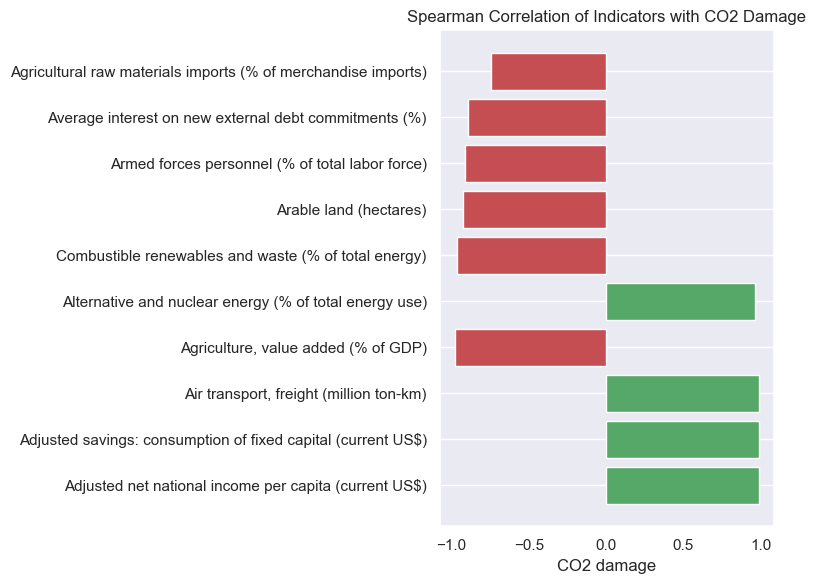

In [228]:
choose_variation = [ 'Adjusted net national income per capita (current US$)', 
 'Adjusted savings: consumption of fixed capital (current US$)',
 'Agriculture, value added (% of GDP)',
  'Air transport, freight (million ton-km)',
  'Alternative and nuclear energy (% of total energy use)',
 'Combustible renewables and waste (% of total energy)',
  'Arable land (hectares)',
  'Armed forces personnel (% of total labor force)',
  'Average interest on new external debt commitments (%)',
  'Agricultural raw materials imports (% of merchandise imports)'
]

indicators = []
correlations = []

for indicator in top_50_indicators:
    if indicator[0] in choose_variation:
        indicators.append(indicator[0])
        correlations.append(indicator[1])
        
plt.figure(figsize=(8, 6))
colors = ['g' if corr > 0 else 'r' for corr in correlations]
plt.barh(indicators, correlations, color=colors)
plt.xlabel('CO2 damage')
plt.title('Spearman Correlation of Indicators with CO2 Damage')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [23]:
df_china_95_05_filter = df_china_95_05_all[df_china_95_05_all['IndicatorName'].isin(choose_variation)]
df_pivot = df_china_95_05_filter.pivot(index='Year', columns='IndicatorName', values='Value').reset_index()
df_result = pd.merge(df_China_95_05[['Year','CO2 Damage']],df_pivot,on=['Year'])
df_result.head()

,Year,CO2 Damage,Adjusted net national income per capita (current US$),Adjusted savings: consumption of fixed capital (current US$),Agricultural raw materials imports (% of merchandise imports),"Agriculture, value added (% of GDP)","Air transport, freight (million ton-km)",Alternative and nuclear energy (% of total energy use),Arable land (hectares),Armed forces personnel (% of total labor force),Average interest on new external debt commitments (%),Combustible renewables and waste (% of total energy)
0,1996,2.108340e+10,601.587632,9.772048e+10,5.119573,19.389904,1688.599976,1.984435,119339000.0,0.594937,6.6188,19.061466
1,1997,2.173644e+10,665.638040,1.118247e+11,5.232279,17.958819,2083.600098,2.073628,119500000.0,0.516721,6.4728,19.065457
2,1998,2.130037e+10,702.034215,1.269068e+11,4.246897,17.221210,2474.199951,2.170678,119850000.0,0.536385,5.7470,18.909452
3,1999,2.183913e+10,737.601696,1.385869e+11,4.299689,16.130914,3295.399902,2.145961,119300000.0,0.530587,5.6682,18.534551
4,2000,2.319198e+10,800.417016,1.563909e+11,4.807262,14.749194,3900.080000,2.242287,118170000.0,0.535991,6.2217,17.533192


In [24]:
cols_to_standardize = df_result.columns[df_result.columns != 'Year']

df_result[cols_to_standardize] = df_result[cols_to_standardize].apply(zscore)

df_result.head()

,Year,CO2 Damage,Adjusted net national income per capita (current US$),Adjusted savings: consumption of fixed capital (current US$),Agricultural raw materials imports (% of merchandise imports),"Agriculture, value added (% of GDP)","Air transport, freight (million ton-km)",Alternative and nuclear energy (% of total energy use),Arable land (hectares),Armed forces personnel (% of total labor force),Average interest on new external debt commitments (%),Combustible renewables and waste (% of total energy)
0,1996,-0.814959,-1.218587,-1.207476,1.505946,1.803482,-1.359221,-1.334956,0.948666,2.539413,1.211152,0.971485
1,1997,-0.740481,-0.962792,-1.008650,1.756960,1.214942,-1.153167,-1.090450,0.997779,-0.219489,1.080194,0.972969
2,1998,-0.790214,-0.817438,-0.796037,-0.437629,0.911597,-0.949409,-0.824404,1.104546,0.474095,0.429173,0.914940
3,1999,-0.728768,-0.675394,-0.631383,-0.320054,0.463209,-0.521027,-0.892159,0.936770,0.269611,0.358492,0.775487
4,2000,-0.574476,-0.424531,-0.380400,0.810386,-0.105029,-0.205593,-0.628099,0.592066,0.460201,0.854965,0.403010


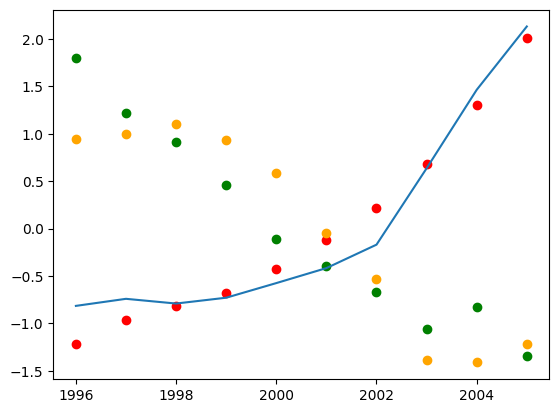

In [173]:
# plt.scatter(df_result['Year'],df_result['Adjusted net national income per capita (current US$)'],color = 'red')
# plt.scatter(df_result['Year'],df_result['Agriculture, value added (% of GDP)'],color = 'green')
# plt.scatter(df_result['Year'],df_result['Arable land (hectares)'],color = 'orange')

# plt.plot(df_result['Year'],df_result['CO2 Damage'])